# SoftMax - Multiclass Classification

In multiclass classification, the target variable $y$ can take on more than two discrete values (e.g., digits 0–9, various diseases, or different defect types).  

Imagine plotting data points on a plane where each cluster represents a different class. Instead of just two clusters (binary), you may have several clusters, each with a unique marker (e.g., circles, triangles, squares).

**Binary vs. Multiclass:**  
- **Binary:** $y \in \{0, 1\}$
- **Multiclass:** $y \in \{1, 2, \dots, n\}$

**Examples:**  
- **Handwritten Digit Recognition:** Recognize digits $0$ through $9$ (10 classes).
- **Medical Diagnosis:** Identify one disease among several possibilities.
- **Quality Inspection:** Classify parts with different types of defects (e.g., scratch, discoloration, chip).

---

## Softmax Regression

Softmax regression extends logistic regression to handle multiclass problems.


**Logistic Regression (Binary):**  

Compute:
  
$$z = \mathbf{w} \cdot \mathbf{x} + b$$
  
Then apply the sigmoid function:
  
$$a = g(z) = \frac{1}{1 + e^{-z}}$$
  
- where $a$ is the probability that $y = 1$. The probability for $y = 0$ is $1 - a$.


**Softmax Regression (Multiclass):**  

For each class $j$ (with $j = 1, 2, \dots, n$), compute:
  
$$z_j = \mathbf{w}_j \cdot \mathbf{x} + b_j.$$
  
Then, calculate the probabilities using the softmax function:
  
$$a_j = \frac{e^{z_j}}{\sum_{k=1}^{n} e^{z_k}}$$
  
The probabilities satisfy:

$$\sum_{j=1}^{n} a_j = 1$$

### Example with 4 Classes

For $n = 4$, compute:

$$
z_1 = \mathbf{w}_1 \cdot \mathbf{x} + b_1,
$$

$$
z_2 = \mathbf{w}_2 \cdot \mathbf{x} + b_2,
$$

$$
z_3 = \mathbf{w}_3 \cdot \mathbf{x} + b_3,
$$

$$
z_4 = \mathbf{w}_4 \cdot \mathbf{x} + b_4.
$$

Then, for each class:

$$
a_j = \frac{e^{z_j}}{e^{z_1} + e^{z_2} + e^{z_3} + e^{z_4}} \quad \text{for } j=1,2,3,4.
$$

In [46]:
def soft_max(z):
    """
    Compute the softmax values for given vector z.
    """

    exp_z = np.exp(z)
    return exp_z / np.sum(exp_z)

In [47]:
z = np.array([1, 2, 3, 4]).reshape(-1, 1)
soft_max(z)

array([[0.0320586 ],
       [0.08714432],
       [0.23688282],
       [0.64391426]])

## Cost Function for Softmax Regression

### Cross-Entropy Loss

**For Logistic Regression (Binary):**

$$
\text{Loss} = -\Big[ y \log(a) + (1-y) \log(1-a) \Big].
$$

**For Softmax Regression (Multiclass):**  

If the true label is $y = j$, the loss for that example is:

$$
L = -\log(a_j).
$$

- A high $a_j$ (close to 1) leads to a low loss.
- A low $a_j$ results in a high loss.
- The overall cost is the average loss over all training examples.

**Cost**

Note that only the line that corresponds to the target contributes to the loss, other lines are zero. To write the cost equation we need an 'indicator function' that will be 1 when the index matches the target and zero otherwise. 

$$\mathbf{1}\{y == n\} = =\begin{cases}
1, & \text{if $y==n$}.\\
0, & \text{otherwise}.
\end{cases}$$
  
Therefore the cost function can be written as:

$$
\begin{align}
J(\mathbf{w},b) = -\frac{1}{m} \left[ \sum_{i=1}^{m} \sum_{j=1}^{N}  1\left\{y^{(i)} == j\right\} \log \frac{e^{z^{(i)}_j}}{\sum_{k=1}^N e^{z^{(i)}_k} }\right]
\end{align}
$$

---

## Neural Networks with a Softmax Output Layer

**Structure:**
- **Input Layer:** Features $\mathbf{X}$.
- **Hidden Layers:** One or more layers with activations (e.g., ReLU).
- **Output Layer:** $K$ neurons (one per class) with a softmax activation.

### Forward Propagation in the Output Layer

For a network with $K$ output classes, compute the logits:

$$
Z_j = \mathbf{W}_j \cdot a^{(L-1)} + b_j \quad \text{for } j = 1, \dots, K,
$$

where $a^{(L-1)}$ are the activations from the previous layer. Then, apply softmax:

$$
a_j = \frac{e^{Z_j}}{\sum_{k=1}^{K} e^{Z_k}}.
$$

**Note:**  
Each $a_j$ depends on all $Z_k$ values, unlike element-wise activations (e.g., sigmoid).

### TensorFlow Implementation (Conceptual Overview)

```python
model = tf.keras.Sequential([
    tf.keras.layers.Dense(25, activation='relu', input_shape=(input_dim,)),
    tf.keras.layers.Dense(15, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')  # For 10 classes
])
```

**Loss Function:**  

Use `SparseCategoricalCrossentropy`:
  
```python
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
```

---

## Numerical Stability in Softmax Implementations

- **Floating-Point Precision:** Exponential functions can produce very large or very small numbers, leading to round-off errors.
- **Example:** Computing $2/10000$ directly versus through an alternative formulation can yield slight differences due to limited precision.

### Improving Stability

**Combine Computations:**  

Instead of computing softmax probabilities and then applying cross-entropy, combine them. This allows frameworks like TensorFlow to rearrange operations for better numerical accuracy.

**TensorFlow Example with Logits:**  

Use `from_logits=True` to compute the loss more stably:

```python
model = tf.keras.Sequential([
    tf.keras.layers.Dense(25, activation='relu', input_shape=(input_dim,)),
    tf.keras.layers.Dense(15, activation='relu'),
    tf.keras.layers.Dense(10)  # Linear activation; outputs are logits
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)
```

---

## Multi-label Classification

**Multi-class vs. Multi-label:**
- **Multi-class:** Each example is assigned exactly one label (even if there are many classes).
- **Multi-label:** Each example can have **multiple labels** simultaneously.

**Example:** In self-driving cars, an image may be labeled for:
- Presence of a car
- Presence of a bus
- Presence of a pedestrian
  
Here, the output might be a vector such as $[1, 0, 1]$, indicating "yes" for car and pedestrian, and "no" for bus.

### Neural Network Implementation for Multi-label Classification

**Approach 1:**  

Train separate binary classifiers for each label.

**Approach 2:**  

Use a single network with multiple outputs:
- **Output Layer:** One neuron per label.
- **Activation:** Use the sigmoid function for each output, as each label represents an independent binary decision.
  
**TensorFlow Example:**
  
```python
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(input_dim,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(3, activation='sigmoid')  # 3 labels: car, bus, pedestrian
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',  # Suitable for multi-label classification
    metrics=['accuracy']
)
```


In [48]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [49]:
X = np.load("data/handwritten_digits_X.npy")
y = np.load("data/handwritten_digits_y.npy")
X.shape, y.shape

((5000, 400), (5000, 1))

In [50]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(400,)),
    tf.keras.layers.Dense(25, activation="relu"),
    tf.keras.layers.Dense(15, activation="relu"),
    tf.keras.layers.Dense(10)
], name="my_model")

model.summary()             

Model: "my_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 25)             │        10,025 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 15)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           160 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,575 (41.31 KB)

 Trainable params: 10,575 (41.31 KB)

 Non-trainable params: 0 (0.00 B)

In [51]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
    optimizer="adam", 
    metrics=['accuracy']
)

In [52]:
history = model.fit(
    X,y,
    epochs=40
)

Epoch 1/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step - accuracy: 0.2757 - loss: 2.0120
Epoch 2/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step - accuracy: 0.8128 - loss: 0.7601
Epoch 3/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step - accuracy: 0.8745 - loss: 0.4721
Epoch 4/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step - accuracy: 0.9003 - loss: 0.3583
Epoch 5/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step - accuracy: 0.9109 - loss: 0.3092
Epoch 6/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step - accuracy: 0.9270 - loss: 0.2593
Epoch 7/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step - accuracy: 0.9326 - loss: 0.2544
Epoch 8/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step - accuracy: 0.9390 - loss: 0.2335
Epoch 9/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step - accuracy: 0.9398 - loss: 0.2246
Epoch 10/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step - accuracy: 0.9415 - loss: 0.2023
Epoch 11/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step - accuracy: 0.9478 - loss: 0.1810
Epoch 12/40
157/157 ━━━━━━━━━━

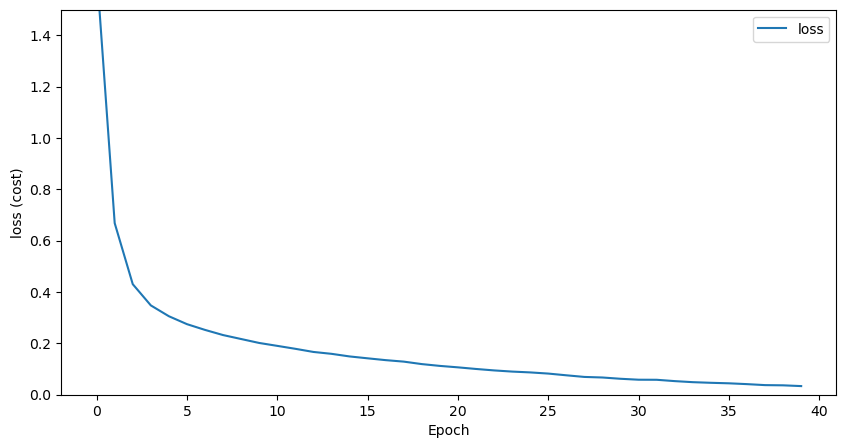

In [53]:
fig,ax = plt.subplots(figsize=(10,5))
ax.plot(history.history['loss'], label='loss')
ax.set_ylim([0, 1.5])
ax.set_xlabel('Epoch')
ax.set_ylabel('loss (cost)')
ax.legend()
plt.show()

In [54]:
# Let's make a prediction
prediction = model.predict(X[1].reshape(1, 400))
prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


array([[ 16.936007 ,  -8.024837 ,   4.4569473,  -3.1349618, -13.377033 ,
         -8.540525 , -10.271873 ,   1.3907887,  -6.614732 ,   6.771345 ]],
      dtype=float32)

In [55]:
# Let's see which digit model is predicting:
print(np.argmax(prediction))

0


In [56]:
# To see probabilities
prediction_p = tf.nn.softmax(prediction)
prediction_p

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[9.9995756e-01, 1.4441941e-11, 3.8053536e-06, 1.9198649e-09,
        6.8421980e-14, 8.6231170e-12, 1.5266849e-12, 1.7732884e-07,
        5.9159629e-11, 3.8505717e-05]], dtype=float32)>

In [57]:
np.argmax(prediction_p)

np.int64(0)

In [58]:
from sklearn.metrics import accuracy_score

yhat = model.predict(X)
yhat = np.argmax(yhat, 1)
accuracy = accuracy_score(y, yhat)
accuracy

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 218us/step


0.9964